In [5]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import requests
import torch
import matplotlib.pyplot as plt


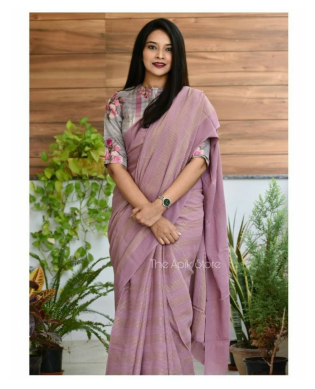

In [7]:
url  = "https://i.pinimg.com/736x/f4/fd/5e/f4fd5e379e27ec39114abd2e3dbef238.jpg"
image = Image.open(requests.get(url, stream=True).raw)
# Convert image to RGB
if image.mode != "RGB":
    image = image.convert("RGB")
# plot image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# save image
image.save("image.jpg")

In [ ]:
# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
# Define candidate scene labels
texts = ["a business executive", "a festival participant"]

# Preprocess and forward pass
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Get probabilities
probs = outputs.logits_per_image.softmax(dim=1)

# Print result
for label, prob in zip(texts, probs[0]):
    print(f"{label}: {prob.item():.4f}")

a business executive: 0.6244
a festival participant: 0.3756
